# 1. Conhecendo as possibilidades


In [8]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1.1 Podemos tirar conclusões a partir de uma amostra?


**Por que podemos tirar conclusões a partir de uma amostra?** Para responder essa pergunta vamos realizar um experimento.



Abaixo temos três conjuntos de dados diferentes que nos mostra formato de distribuições diferentes:


*  1️⃣ **Idade de Aposentadoria** Coletamos dados de idade de aposentadoria de uma amostra, e ao analisar o histograma dessas idades, observamos que há uma concentração na faixa média de idades, mas algumas pessoas aposentam mais cedo.

* 2️⃣ **Tempo de vida de uma lâmpada**: é essencial para garantir qualidade, eficiência energética e planejar estratégias de manutenção. Sabendo como uma lâmpada vive podemos oferecer garantias confiáveis, é esperado que poucas lampadas de tempo de vida curto (falhas prematuras), com um tempo de vida grande diminui a probabilidade de a lâmpada durar.

* 3️⃣ **Altura de funcionários**: Compreender a distribuição das alturas dos funcionários é crucial para a concepção de um ambiente de trabalho ergonômico. Isso ajuda na adaptação de estações de trabalho, cadeiras e equipamentos para garantir conforto e eficiência.

In [9]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

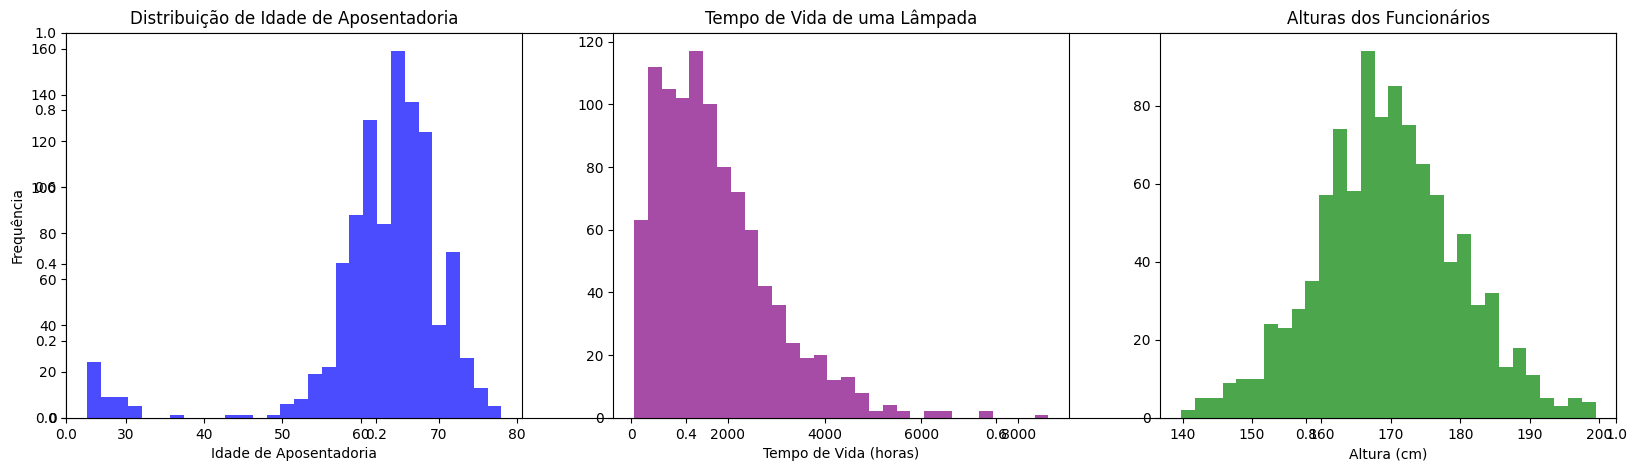

In [10]:
# Várias distribuições
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

In [11]:
# Reamostragens

# tamanho da amostra
n = 100

# quantidade de amostras
qtd = 100000

# função de reamostragem e cálculo de médias
def reamostragem_media(dados, coluna, n, qtd):
  medias = [dados[coluna].sample(n, replace=True).mean() for _ in range(qtd)]
  return medias


In [12]:
# Realizando as reamostragens com a função
media_idade = reamostragem_media(dados_idade_aposentadoria, 'idade', n, qtd)
media_duracao = reamostragem_media(dados_vida_lampada, 'duracao', n, qtd)
media_altura = reamostragem_media(dados_alturas, 'alturas', n, qtd)

#### **População vs Amostra**
Vamos **comparar** agora a distribuição original com a distribuição das amostras, comparando a média das distribuições originais e com a distribuições média das médias amostrais.


In [13]:
print("*****  Médias populacionais *****")
print('Idade', dados_idade_aposentadoria['idade'].mean())
print('Duração Lammpadas', dados_vida_lampada['duracao'].mean())
print('Altura', dados_alturas['alturas'].mean())

*****  Médias populacionais *****
Idade 62.70857142857143
Duração Lammpadas 1731.8036029420002
Altura 169.52022


In [14]:
def Average(lst):
    return sum(lst) / len(lst)

print("*****  Médias pamostrais *****")

print('Idade',Average(media_idade))
print('Duração Lammpadas',Average(media_duracao))
print('Altura',Average(media_altura))


*****  Médias pamostrais *****
Idade 62.71558030000018
Duração Lammpadas 1732.071813381068
Altura 169.514939331998


As médias das amostras está **muito próximo da média** das distribuições originais. Vamos entender como as médias das amostras se distribuem?  

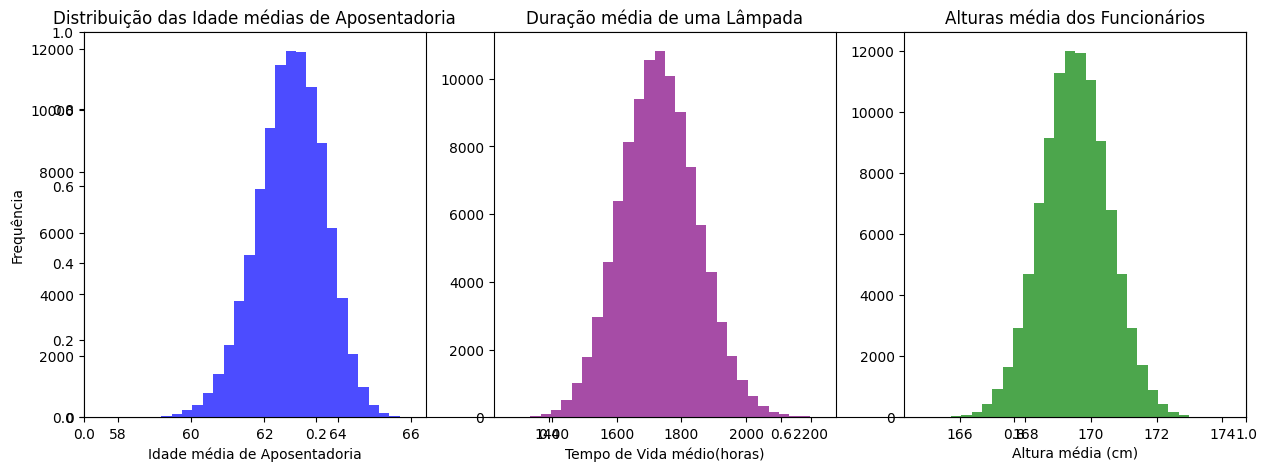

In [15]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()


#### **Teorema do limite central**

<img src="https://i.imgur.com/5mWzZJO.png" alt="drawing" width="1000"/>

Perceba que independente da distribuição de origem, para n grande, observamos o mesmo formato para a distribuição da média das amostras. Um formato de sino! Isso não parece trivial, mas o Teorema do Limite Central nos diz isso!


Se analizarmos a **maioria das médias amostrais está próxima da média da distribuição original**. Algumas mais alta, outras serão mais baixa.
Há outro ponto que o TLC nos diz, quanto maior a quantidade de amostras, mais próxima a média amostral.

Aqui voltamos para a pergunta incial: **Podemos tirar conclusões a partir de uma amostra?** Sim! aqui vimos as médias amostrais é bem próxima das médias da
distribuições originais, mas também observamos que há um risco de obter uma amostra com média diferente da população.




**************
#### **✨ Atividade:** O efeito do tamanho da amostra.

No experimento anterior retiramos 1000 amostras de tamanho 100. E se mudassemos o tamanho? Substitua o código da atividade e execute. O gráfico está preparado para te mostrar a variabilidade da média em relação a quantidade de amostra.






******

## 1.3 Quão confiáveis são nossas conclusões sobre a amostra?

A indústria de lâmpadas nos contratou! E uma nova verificação nas lâmpadas foi realizada, coletando a duração de outras lâmpadas, já sabemos que podemos inferir e tirar conclusões a partir dessa amostra. Nos informaram que a duração média desse novo experimento foi de **1200 horas.**

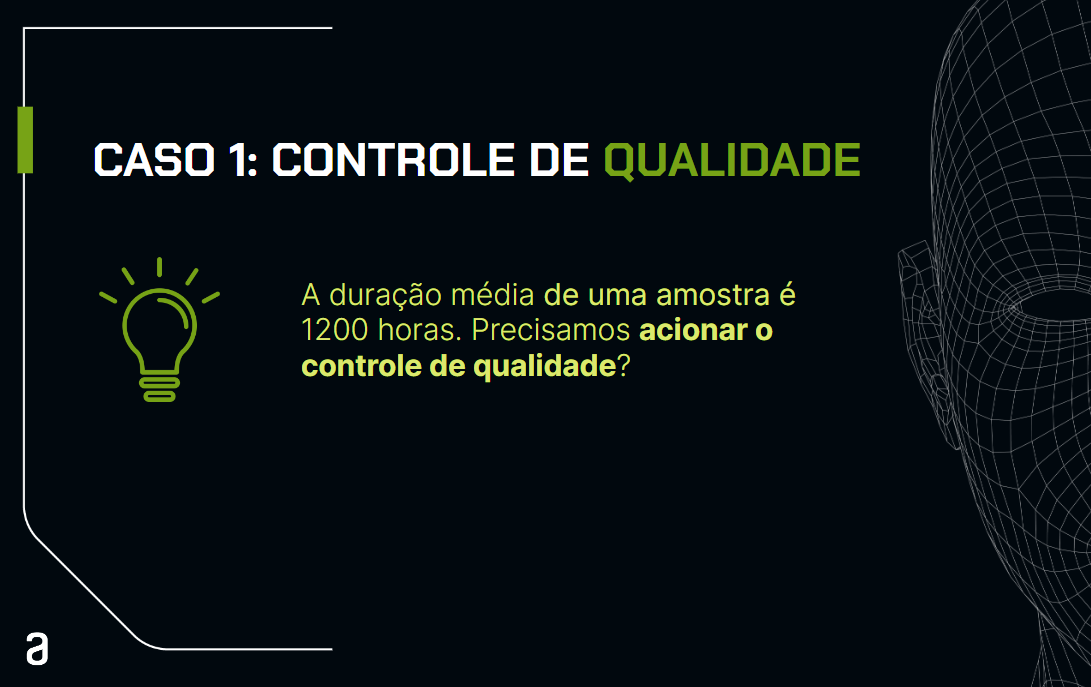


In [16]:
# média da nova amostra
media_nova_amostra = 1200

In [17]:
# media original
print(dados_vida_lampada['duracao'].mean())

1731.8036029420002


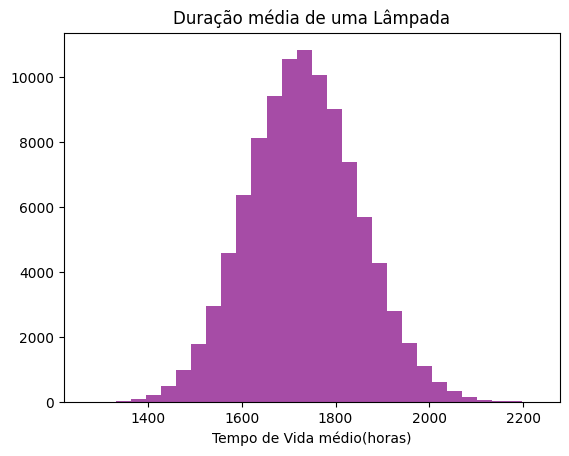

In [18]:
# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

Pelo experimento anterior do TLC, sabemos que uma lampada dura em média 1732 horas, quando nos deparamos com o resultado desse novo experimento, vimos que a média de duração das lampadas está bem menor que o esperado, 1200 horas. A sua intuição te faz questionar:

* Esses dados estão corretos?
* Estamos lidando com o mesmo tipo de lâmpadas?
* Se tudo for verdade, então parece que as lâmpadas das fábricas precisam passar pelo controle de qualidade de seus materiais.

Mas antes de informar sua intuição, outra pergunta fica no ar: **o quão confiante eu posso pedir para verificarem a qualidade das lampadas?** Para responder essa pergunta, precisamos entender o quão distante a média dessa nova amostra está da amostra populacional.

E para isso voltamos ao experimento das médias amostrais.

#### Distribuição Normal

Na distribuição normal, as médias amostrais geralmente se aproximam da média verdadeira. No entanto, a média pode variar entre amostras. O conceito de erro padrão ajuda a entender essa variação sem a necessidade de visualizar um gráfico.


In [19]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})

In [20]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1732.0718133810594
Erro Padrão: 118.5952499973757


In [21]:
# Quantos erros?
1732 - 3*EP


1376.214250007873

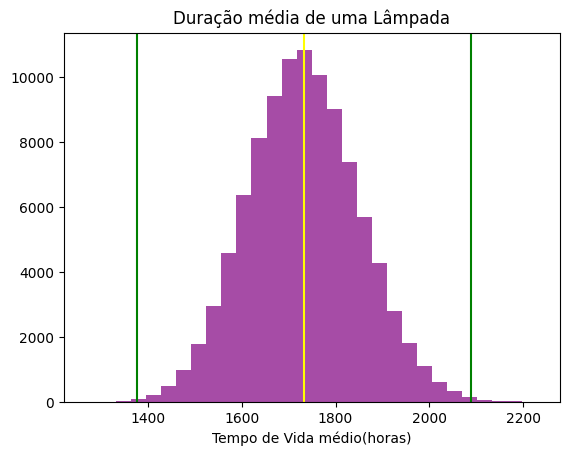

In [22]:
# Visualizando a quantidade de amostras entre 3EP +- da média.
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.axvline(media_das_medias, color = "yellow")
plt.axvline(media_das_medias + 3*EP , color = "green")
plt.axvline(media_das_medias - 3*EP, color = "green")
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

Esse senso de variabilidade nos traz a noção do nível de confiança de decisões baseados em amostras. Voltanto para o novo experimento, 1200 horas média para as novas lampadas é bem menos que 3 erros padrões. Graças ao poder desse formato simétrico, podemos entender quantas médias estão de três EP para mais ou para menos, mas quanto isso significa?
Para isso vamos fazer contabilizar as observações nesse intervalo.

In [23]:
#quanto está no intervalo de +ou- 3 EP?
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]

In [24]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.727


 Isso indica que se os dados estão corretos e estamos falando do mesmo tipo de lâmpadas, podemos informar ao controle de qualidade a verificação à um nível de confiança de 99,7%.


### Nível de confiança

![](https://i.imgur.com/2Jnp4T6.png)



Graças a distribuição normal, o nome para esse formato de sino, esse padrão é esperado, ou seja, esperamos que:
* 68% de todas as médias amostrais se situem dentro de um erro padrão em relação a média populacional;
* 95% das médias amostrais  estão dentros de dois EP e;
* 99,7% das médias de amostras estão entre 3 EPs em relação a média populacional.

Esse padrão quantifica então o nível de confiança levado em consideração nas análises amostrais.



## 1.4 Estabelecendo um intervalo de confiança






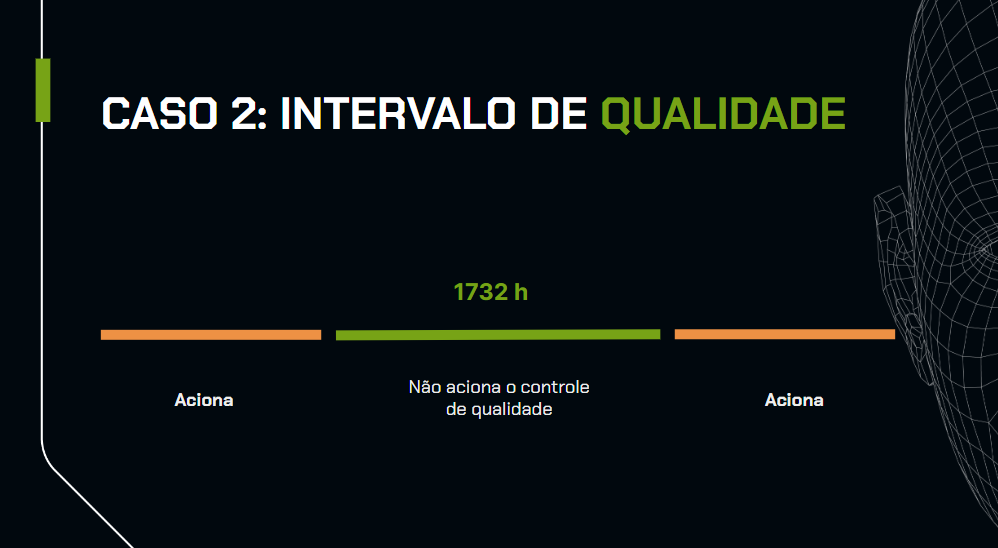

Para estabelecer uma intervalo que contenha a verdadeira duração média das lâmpadas, vamos levar em consideração 3 aspectos:

* A duração média
* O nível de confiança
* A variabilidade dos meus dados.

Nesse intervalo adicionamermos uma magem de erro na média, contendo então o nível de confiança e a variabildiade dos dados.

Aqui no python, vamos importar a biblioteca para nos ajudar nesse cálculo.


In [25]:
#importando scipy
from scipy import stats

In [26]:


# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

Podemos estabelecer o nível de confiança de 0.95, isso quer dizer, segundo o TCL, que para 95 amostras em 100, a média da amostra estará dentro de dois EP da média real. O nível de confiança é um crítério que deve ser estabelecido junto aos tomadores de decisão, uma vez que está relacionado ao erro e a restrição desse intervalo.

In [27]:
#informações para o IC
media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [28]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra))


In [29]:
# Visualizando os resultados

print(f"IC (95%): {intervalo_confianca}")

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))


In [30]:
#Mão na massa: avaliando o desempenho das vendas
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39,
                                            34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30,
                                            25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37,
                                            36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34,
                                            36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57,
                                            40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30,
                                            36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})
df_techtaste.head()

,avaliacoes
0,38
1,44
2,33
3,42
4,47


In [31]:
#1. Calcule o desvio padrão amostral das avaliações.
desPadrao = df_techtaste['avaliacoes'].std()
print(f'Desvio padrão: {desPadrao:.2f}')

Desvio padrão: 6.42


In [32]:
#2. Calcule o erro padrão da média para as avaliações dos clientes.
from scipy import stats
erroPadrao = stats.sem(df_techtaste['avaliacoes'])
print(f'Erro padrão: {erroPadrao:.2f}')

Erro padrão: 0.72


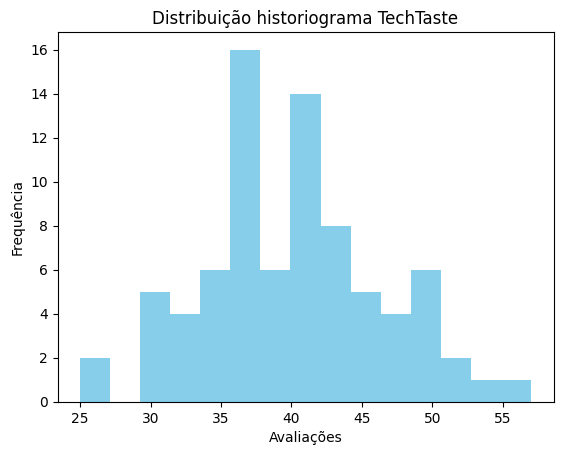

In [33]:
#3. Utilizando de ferramentas de visualização gráfica, analise visualmente a distribuição das avaliações dos clientes.
import matplotlib.pyplot as plt

# Gráfico de histograma
plt.hist(df_techtaste['avaliacoes'], bins=15, color='skyblue')
plt.title('Distribuição historiograma TechTaste')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.show()

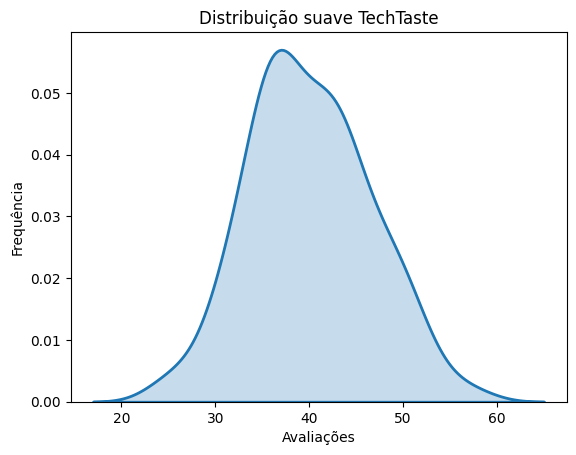

In [34]:
#OUTRO MODO DE VISUALIZAÇÃO
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição suave TechTaste')
plt.show()

In [35]:
#4. Observe o formato da distribuição gerada. Ele se assemelha a uma distribuição normal?
#SIM, pois os dados de encontram mais centrados à média dos dados.

In [36]:
#5. Com um nível de confiança de 90%, calcule o intervalo de confiança para a média das avaliações.
confianca = 0.90
intConfianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erroPadrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intConfianca}')

Intervalo de Confiança (90.0%): (np.float64(38.84402439920928), np.float64(41.205975600790715))


In [37]:
#6. A largura do intervalo de confiança seria afetada se o nível de confiança fosse aumentado para 95%?
#SIM, aumentará
confianca = 0.95
intConfianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erroPadrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intConfianca}')

Intervalo de Confiança (95.0%): (np.float64(38.617780776207844), np.float64(41.43221922379215))


Esse resultado nos diz que com 95% de confiança a verdadeira média da duração de lâmpadas está contida nesse intervalo, a partir da amostra analisada

# 2. Teste para uma amostra

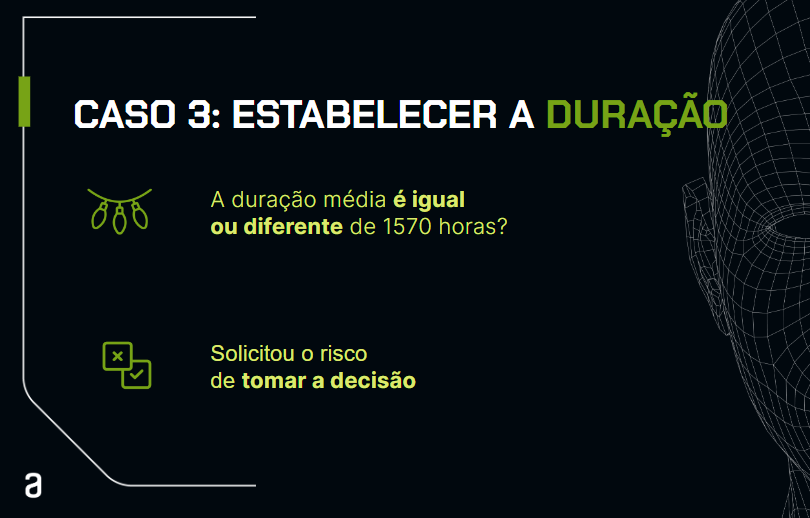

> Caso 3: Estabelecer a duração: Fomos contratados para mais um projeto para a indústria de lâmpadas, mas dessa vez para afirmar se a duração média de todas as lâmpadas de natal da marca é igual ou diferentes de 1565 horas.

## 2.1 Formulando a hipótese

In [38]:
# hipotese nula
hipotese = 1570

Estabelecidas as hipóteses,

$H_0 : \mu = 1570$\
$H_1 : \mu \neq 1570$

podemos identificar o critério para rejeitar ou não a hipótese estabelecida, mas antes vamos conhecer nossa região crítica, o critério de rejeição.


## 2.2 Estabelecendo a regra de decisão

Para tomar essa decisão e cálcular a probalidade de estarmos assumindo um erro, precisamos considerar uma regra de decisão, ou seja, entender quando vamos assumir que Ho é rejeitada.

Para essa regra, podemos levar em consideração uma conceito que já vimos aqui, o intervalo de confiança, que estabelece uma margem de erro para a média a partir de um nivel de confiança na variabilidade dos dados.




In [39]:
# dados amostrais
lampadas_natalinas = pd.read_csv("/content/experimento_lampadas_natalinas.csv")

In [40]:
#média amostral
lampadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [41]:
#informações para a região crítica

confianca = 0.95  # Nível de confiança desejado
desvio_padrao_populacional = 105  #sigma dado pela fabrica
tamanho_amostra = len(lampadas_natalinas['duracao'])

In [42]:
#calculando o IC
intervalo = stats.norm.interval(confianca,
                                loc = 1570,
                                scale = desvio_padrao_populacional / np.sqrt(tamanho_amostra) )

In [43]:
print('Intervalo de confiança (95%)', intervalo)

Intervalo de confiança (95%) (np.float64(1549.4203781623294), np.float64(1590.5796218376706))


Esse é o intervalo de confiança, estabelecido pela amostra à 95% de confiança sob Ho.


  Calculando a média amostral, obtemos 1530.30 horas, esse valor não está contido na região de aceitação. Ou seja, Não podemos dizer que a duração média das lampadas é 1570 à 95% de confiança.

  Mas qual a probabilidade de estar rejeitando incorretamente Ho? Para isso precisamos entender os erros associados a essa decisão.

## 2.3 Erros associados a testes de hipóteses
Qualquer que seja a decisão tomada, estamos sujeitos a cometer erros: \
O erro de rejeitar Ho quando na verdade ela é verdadeira, e o erro de não rejeitar Ho, mas ela é falsa.



In [44]:
# nível de significancia: quando você rejeita erroneamente a hipótese nula quando ela é realmente verdadeira.
confianca
nivel_significancia = round(1-confianca,2)
nivel_significancia

0.05

## 2.4 Em qual intensidade estamos rejeitando a hipótese?


Perceba que até agora estabelecemos um nível de confiança para interpretar nossos resultamos, no entanto nossa decisão pode alterar dependendo do rigor de confiança que estabelecemos

In [45]:
#importando o teste Z do statsmodels
from statsmodels.stats.weightstats import ztest

In [46]:
#Executando o teste z
stats, p_valor = ztest(x1 = lampadas_natalinas['duracao'], value = 1570, alternative = 'two-sided')


In [47]:
# média amostral
lampadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [48]:
# Exibe os resultados
print(p_valor)

0.0


In [49]:
# Verifica a hipótese nula com base no valor-p


if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


In [50]:
#ATIVIDADE DA AULA
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [51]:
#1 - Calcule a média amostral das avaliações.
mediaAmostral = df_techtaste['avaliacoes'].mean()
print(f"Média Amostral: {mediaAmostral}")

Média Amostral: 40.025


In [52]:
#2 - Formule hipóteses para o problema da empresa.
'''
H0: u = 30
H1: u != 30
'''

'\nH0: u = 30\nH1: u != 30\n'

In [53]:
#3 - Estabelecidos o nível de confiança em 95% e o desvio padrão populacional em 2.65, verifique se a média da amostra está definida dentro do intervalo de confiança da hipótese nula.
confianca = 0.95
desvioPadrao = 2.65
tamanhoAmostral = len(df_techtaste['avaliacoes'])

from scipy import stats
intervaloConfianca = stats.norm.interval(confianca,
                                        loc = 30,
                                        scale = desvioPadrao / np.sqrt(tamanhoAmostral) )
print(f'IC (95%): {intervaloConfianca}')


IC (95%): (np.float64(29.419303816868016), np.float64(30.580696183131984))


In [54]:
#4 - O que é possível entender a partir do resultado da etapa anterior?
#Como a média amostral(40.025) está fora do intervalo de confiança da hipótese nula,
#podemos pensar em rejeitar a hipótese.

In [55]:
#5 - Utilize o Teste Z para calcular o valor da Estatística Z e o p-valor para o problema da TechTaste.
from statsmodels.stats.weightstats import ztest
stats, p_valor = ztest(x1 = df_techtaste['avaliacoes'], value = 30, alternative = 'two-sided')
print(f'Estatística Z: {stats}')
print(f'Valor-p: {p_valor}')

Estatística Z: 13.96274198988354
Valor-p: 2.6311293593122384e-44


In [56]:
#6. Pelos resultados anteriores, a hipótese nula formulada é rejeitada ou não rejeitada? Explique o que justifica sua decisão.
#A hipotese foi rejeitada pois a probabiliade de achar a média amostral dentro da hipótese é menor do que
#o nivel de significancia de 5%.
if p_valor < 0.05:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeita a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula



**Estatística Z:** O valor da estatística Z é -2.63, Isso indica que a média da amostra está cerca de 2,63 desvios padrão abaixo da média populacional assumida na hipótese nula. O sinal negativo sugere que a média da amostra está abaixo da média populacional hipotética.



 **P-valor: 0.008**: Isso representa a probabilidade de obter uma estatística Z tão ou mais extrema do que a observada, assumindo que a hipótese nula é verdadeira. Há uma probabilidade de 0.8% de observarmos uma média de amostra tão ou mais discrepante da média hipotética.


# 3. Teste para uma amostra pequena

## 3.1 Formulando a hipótese

![](https://i.imgur.com/Migcj7Y.png)


> **Caso 2:**  Uma empresa de software está interessada em verificar se o tempo médio de resposta de seu suporte técnico é **menor que 30 minutos**, como prometido no acordo de nível de serviço (SLA). Eles coletam dados sobre o tempo de resposta para uma amostra de 25 solicitações de suporte.




In [57]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

Estabelecidas as hipóteses:

$H_0 : \mu = 30$\
$H_1 : \mu \leq 30$

Seguimos para o teste, e dessa vez não temos informação sobre a população, Qual teste podemos seguir?

## 3.2 Aplicando o Teste T


Quando não temos informações sobre a variabilidade da nossa população, sobretudo quando nossa amostra é pequena. Seguimos com um teste t, que segue o mesmo princípio do teste z.


In [58]:
#média coletada do tempo
np.mean(tempo_resposta)

np.float64(29.96)

In [59]:
#importando ttest_1samp
from scipy.stats import ttest_1samp

In [60]:
# Realiza o teste t unilateral para uma amostra
stats, p_valor = ttest_1samp(tempo_resposta, 30, alternative = "less")

In [61]:
# Exibe os resultados
print(p_valor)

0.4585970095667924


## 3.3 Interpretando o Teste T

![](https://i.imgur.com/3yvNUJR.png)

In [62]:
nivel_significancia = 0.05


if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


conclusao

'Não rejeita a hipótese nula'

In [63]:
#ATIVIDADE DA AULA
import pandas as pd

# Conjunto de dados Techsafe
df_techsafe = pd.DataFrame({'porcentagem_compressao': [21.99342831, 20.7234714 , 22.29537708, 24.04605971, 20.53169325, 20.53172609, 24.15842563, 22.53486946, 20.06105123, 22.08512009, 20.07316461, 20.06854049, 21.48392454, 17.17343951, 17.55016433, 19.87542494, 18.97433776, 21.62849467, 19.18395185, 18.1753926, 23.93129754, 20.5484474 , 21.13505641, 18.15050363, 19.91123455]})

In [64]:
#1 - Formule uma hipótese para o caso da Techsafe.
'''
H0: u = 20
H1: u > 20
'''

'\nH0: u = 20\nH1: u > 20\n'

In [65]:
#2 - Calcule a média amostral dos dados.
mediaAmostral = df_techsafe['porcentagem_compressao'].mean()
print(f'Média amostral: {mediaAmostral}')

Média amostral: 20.6729838832


In [66]:
#3 - Estabeleça um nível de confiança para o problema e calcule o nível de significância.
confianca = 0.95
nivelSignificancia = round(1-confianca,2)
print(f'Nível de significância: {nivelSignificancia}')

Nível de significância: 0.05


In [67]:
#4 - Utilize o Teste t para calcular o valor da estatística t e o p-valor para o problema da Techsafe, mostre os dados.
from scipy.stats import ttest_1samp
stats, p_valor = ttest_1samp(df_techsafe['porcentagem_compressao'], 20, alternative = 'greater')
print(f'Estatística t: {stats}')
print(f'Valor-p: {p_valor}')

Estatística t: 1.7588775656761988
Valor-p: 0.04567200091129674


In [68]:
#5 - Pelos resultados anteriores, a hipótese nula formulada é rejeitada ou não rejeitada? Explique o que justifica sua decisão.
#Rejeitamos a hipotese pois o valor probabilistico é menor do que o nivel de significancia
if p_valor < nivelSignificancia:
    decisao = 'Rejeitar a hipótese nula'
else:
    decisao = 'Não rejeitar a hipótese nula'

print(f'Decisão: {decisao}')

Decisão: Rejeitar a hipótese nula


# 4. Teste para duas amostras


## 4.1 Amostras independentes

> Caso 5 : Estamos prestando consultoria para uma empresa de e-commerce, e no meio de uma reunião surge uma hipótese: "A propaganda produz efeito positivo nas vendas" Podemos inserir mais propagandas no site para aumentar as vendas?

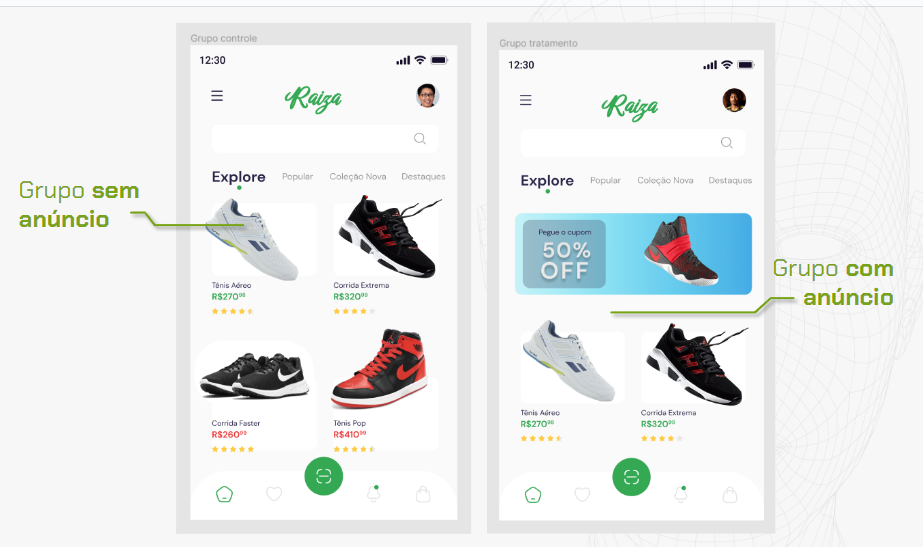

In [69]:
vendas_com_propaganda = [329.80,  291.70,  338.86,  391.38,
                         285.95,  285.95,  394.75,  346.05,
                         271.83,  332.55,  272.19,  272.06,
                         314.52,  185.20,  196.50,  266.26,
                         239.23,  318.85,  245.52,  215.26,
                         387.94,  286.45,  304.05,  214.52,
                         267.34,  306.66,  230.94,  322.54,
                         263.96,  282.50,  263.90,  411.14,
                         299.19,  236.54,  349.35,  226.75,
                         312.53,  182.42,  220.31,  311.81,
                         344.31,  310.28,  293.06,  281.93,
                         211.29,  256.81,  272.36,  363.43,
                         320.62,  194.22]



In [70]:
vendas_sem_propaganda = [304.44,  261.89,  244.38,  321.70,
                         346.86,  340.88,  234.65,  266.45,
                         304.88,  343.53,  256.25,  273.86,
                         218.62,  213.23,  333.75,  366.37,
                         280.68,  345.21,  306.70,  246.29,
                         306.68,  377.28,  282.85,  378.88,
                         127.82,  334.31,  290.22,  267.06,
                         290.51,  165.74,  271.82,  306.43,
                         373.67,  253.90,  236.49,  254.89,
                         339.92,  304.73,  253.21,  315.80,
                         290.82,  343.12,  242.88,  265.34,
                         261.47,  197.19,  302.77,  300.66,
                         285.31,  270.92]



In [71]:
# média com
print(np.mean(vendas_com_propaganda))
# média sem
print(np.mean(vendas_sem_propaganda))

286.4712
286.0662


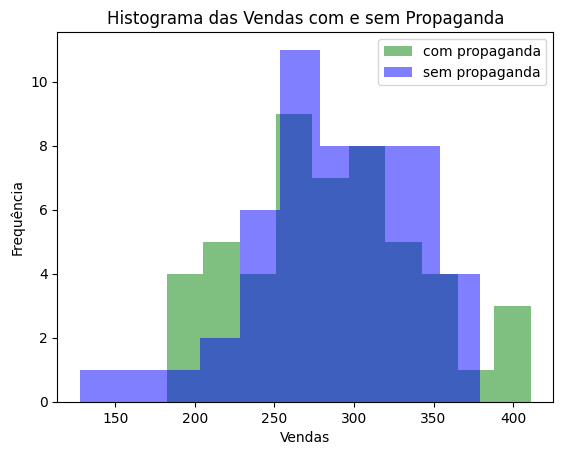

In [72]:
# Criar histogramas
plt.hist(vendas_com_propaganda, color = 'green', alpha = 0.5, label = 'com propaganda')
plt.hist(vendas_sem_propaganda, color = 'blue', alpha = 0.5, label = 'sem propaganda')
# Adicionar rótulos e título
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

Hipóteses desse teste de amostras independentes:\
$H_0$: media sem = media com\
$H_1$: media sem < media com

In [73]:
#teste t para amostras independentes (ttest_ind)
from scipy.stats import ttest_ind


In [74]:
# Aplicação do teste t de Student para amostras independentes
stats, p_valor = ttest_ind(vendas_com_propaganda, vendas_sem_propaganda, alternative = "greater")


In [75]:
# Exibição dos resultados
print(p_valor)


0.48515518670338376


In [76]:

# Interpretação dos resultados

alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula: Há evidências de que a propaganda tem um efeito positivo nas vendas.")
else:
    print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.")


Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.


## 4.2 Amostras pareadas

![](https://i.imgur.com/E0frsTB.png)

> Caso 6: Programa de treinamento da equipe de atendimento ao cliente
do e-commerce quer avaliar o impacto de um programa de treinamento em seu desempenho. A empresa coletou dados de avaliações de desempenho antes e depois do treinamento para os mesmos funcionários. Eles desejam determinar se há uma diferença significativa nas avaliações antes e depois do treinamento.


In [77]:
antes_do_treinamento = [78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [78]:
# Comparando antes e depois
resultado_subtracao = [b - a for a, b in zip(antes_do_treinamento,apos_o_treinamento)]
resultado_subtracao

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]

Hipóteses desse teste de amostras pareadas:\
$H_0: μ_d = 0$\
$H_1: μ_d > 0 $

$μ_d$ é média das diferenças dos pares.

In [79]:
#importando o teste pareado ttest_rel
from scipy.stats import ttest_rel

In [80]:
# Aplicando o teste t pareado
stats, p_valor = ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative="greater")

In [81]:
print(p_valor)

0.000627744161772394


In [82]:
#ATIVIDADE DA AULA
#PRIMEIRO CASO
import pandas as pd

df_equipe_vendas = pd.DataFrame({'Vendedor': [ 'Luíza', 'Bia', 'Rodrigo', 'Allan', 'Evaldo'],
                                 'Vendas Antes (R$)': [252.72, 203.91, 307.32, 185.78, 220.5],
                                 'Vendas Depois (R$)': [285.1, 223.15, 324.41, 202.23, 240.63]})

In [83]:
#1 - Defina a natureza das amostras. Temos um caso de amostra independente ou pareada?
'''
Temos um caso de amostras pareadas
'''

'\nTemos um caso de amostras pareadas\n'

In [84]:
#2 - Formule uma hipótese para o primeiro caso da Zoop Megastore.
'''
Hipótese Nula (H0): A média das diferenças entre as observações é igual a zero.
Hipótese Alternativa (H1): A média das diferenças é diferente de zero.
'''

'\nHipótese Nula (H0): A média das diferenças entre as observações é igual a zero.\nHipótese Alternativa (H1): A média das diferenças é diferente de zero.\n'

In [85]:
#3 - Aplique um teste paramétrico para tomar a decisão da hipótese.
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(df_equipe_vendas['Vendas Depois (R$)'], df_equipe_vendas['Vendas Antes (R$)'])
print(f'Estatística do teste t pareado: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste t pareado: 7.23705258430516
Valor-p: 0.0019344230773580572


In [86]:
#4 - Pelos resultados anteriores, a hipótese nula formulada é rejeitada ou não rejeitada?
#Explique o que justifica sua decisão.
#Rejeitamos a hipotese nula pois resultado de p_valor foi menor dq o nives de significancia
nivelSignificancia = 0.05
if p_valor < nivelSignificancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


In [87]:
#SEGUNDO CASO
import pandas as pd

df_filiais = pd.DataFrame({'Filial Centro-Norte': [3.2, 2.9, 2.0, 3.3, 3.1],
                           'Filial Sul': [3.8, 4.0, 4.7, 4.9, 4.8]})

In [88]:
#1 - Defina a natureza das amostras. Temos um caso de amostra independente ou pareada?
'''
Temos um caso de amostras independentes
'''

'\nTemos um caso de amostras independentes\n'

In [89]:
#2 - Formule uma hipótese para o primeiro caso da Zoop Megastore.
'''
H0: (média da filial Centro-Norte) = (média da filial Sul)
H1: (média da filial Centro-Norte) != (média da filial Sul)
'''

'\nH0: (média da filial Centro-Norte) = (média da filial Sul)\nH1: (média da filial Centro-Norte) != (média da filial Sul)\n'

In [90]:
#3 - Aplique um teste paramétrico para tomar a decisão da hipótese.
from scipy.stats import ttest_ind

stat, p_valor = ttest_ind(df_filiais['Filial Centro-Norte'], df_filiais['Filial Sul'])

print(f'Estatística do teste t independente: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste t independente: -4.73902240270431
Valor-p: 0.001465798816319686


In [91]:
#4 - Pelos resultados anteriores, a hipótese nula formulada é rejeitada ou não rejeitada?
#Explique o que justifica sua decisão.
#Rejeitamos a hipotese nula pois resultado de p_valor foi menor dq o nives de significancia
nivelSignificancia = 0.05
if p_valor < nivelSignificancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


![](https://i.imgur.com/A65w138.png)

# 5. Testes não paramétricos

## 5.1 Limitações dos testes paramétricos

* Dados com outliers influentes
* Não faz pressupostos para distribuição
* Usados quando temos amostras muitos pequenas, e não conseguimos identificar a distribuição dos dados
* Análise qualitativa

## 5.2 Aplicando teste de Mann-Whitney

![](https://i.imgur.com/W19IoKi.png)

> Caso 7: Comparar a eficácia de duas metodologias de treinamento físico, chamadas Treino A e Treino B, em termos de melhoria no desempenho atlético. Os participantes do estudo foram divididos aleatoriamente em dois grupos, um submetido ao Treino A e o outro ao Treino B. Foi registrado o ganho de força de cada indivíduo dos que fizeram o Treino A e daqueles que fizeram o Treino B





In [92]:
# Dados de desempenho dos dois grupos
treino_a = [5, 3, 8, 4, 6]
treino_b = [4, 2, 7, 5, 3]

In [93]:
# Importando teste mannwhitneyu
from scipy.stats import mannwhitneyu

$H_0:$ As distribuições das duas populações são iguais.\
$H_1:$ As distribuições das duas populações são diferentes.

In [94]:
# Aplicando o teste de Mann-Whitney
stats, p_valor = mannwhitneyu (treino_a, treino_b, alternative = "two-sided")

In [95]:
print(p_valor)

0.4605966187047713


In [96]:
#H0 é que A e B tenham a mesma distribuição?
#Quanto mais baixo for o valor de U, maior será a evidência de que as populações são diferentes.

In [97]:
#TESTANTO CONHECIMENTO

import pandas as pd

# Dados do exemplo
df = pd.DataFrame({'Desempenho': {0: 'Regular', 1: 'Bom', 2: 'Bom', 3: 'Excelente', 4: 'Bom', 5: 'Bom', 6: 'Regular', 7: 'Regular', 8: 'Excelente', 9: 'Ruim', 10: 'Bom', 11: 'Regular', 12: 'Muito Bom', 13: 'Bom', 14: 'Bom', 15: 'Regular', 16: 'Muito Bom', 17: 'Bom', 18: 'Muito Bom', 19: 'Excelente', 20: 'Ruim', 21: 'Excelente', 22: 'Ruim', 23: 'Ruim', 24: 'Regular', 25: 'Excelente', 26: 'Ruim', 27: 'Excelente', 28: 'Excelente', 29: 'Regular', 30: 'Regular', 31: 'Ruim', 32: 'Regular', 33: 'Regular', 34: 'Muito Bom', 35: 'Excelente', 36: 'Regular', 37: 'Excelente', 38: 'Excelente', 39: 'Muito Bom', 40: 'Ruim', 41: 'Ruim', 42: 'Ruim', 43: 'Ruim', 44: 'Muito Bom', 45: 'Regular', 46: 'Excelente', 47: 'Muito Bom', 48: 'Muito Bom', 49: 'Muito Bom', 50: 'Muito Bom', 51: 'Muito Bom', 52: 'Bom', 53: 'Ruim', 54: 'Muito Bom', 55: 'Bom', 56: 'Bom', 57: 'Excelente', 58: 'Bom', 59: 'Muito Bom'},
                   'Metodo_Ensino': {0: 'Moderno', 1: 'Tradicional', 2: 'Tradicional', 3: 'Moderno', 4: 'Moderno', 5: 'Moderno', 6: 'Moderno', 7: 'Moderno', 8: 'Moderno', 9: 'Tradicional', 10: 'Tradicional', 11: 'Moderno', 12: 'Tradicional', 13: 'Moderno', 14: 'Tradicional', 15: 'Tradicional', 16: 'Moderno', 17: 'Moderno', 18: 'Tradicional', 19: 'Tradicional', 20: 'Moderno', 21: 'Tradicional', 22: 'Moderno', 23: 'Moderno', 24: 'Tradicional', 25: 'Tradicional', 26: 'Moderno', 27: 'Moderno', 28: 'Moderno', 29: 'Moderno', 30: 'Moderno', 31: 'Moderno', 32: 'Tradicional', 33: 'Moderno', 34: 'Tradicional', 35: 'Tradicional', 36: 'Tradicional', 37: 'Moderno', 38: 'Tradicional', 39: 'Moderno', 40: 'Tradicional', 41: 'Moderno', 42: 'Tradicional', 43: 'Moderno', 44: 'Moderno', 45: 'Moderno', 46: 'Moderno', 47: 'Moderno', 48: 'Moderno', 49: 'Tradicional', 50: 'Moderno', 51: 'Moderno', 52: 'Moderno', 53: 'Moderno', 54: 'Tradicional', 55: 'Moderno', 56: 'Moderno', 57: 'Tradicional', 58: 'Moderno', 59: 'Tradicional'}})

# Tabela de contingência
tab_contingencia = pd.crosstab(df['Desempenho'], df['Metodo_Ensino'])

In [98]:
tab_contingencia

Metodo_Ensino,Moderno,Tradicional
Desempenho,,
Bom,8,4
Excelente,6,6
Muito Bom,7,6
Regular,8,4
Ruim,8,3


In [99]:
from scipy.stats import chi2_contingency

chi2, p_valor, _, _ = chi2_contingency(tab_contingencia)

# Resultados iniciais
print(f'Estatística chi2: {chi2}')
print(f'p-valor: {p_valor}')

# Tomada de decisão
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Estatística chi2: 1.850394024307068
p-valor: 0.7632507187470916
Conclusão: Não rejeitar a hipótese nula


## 5.3 Utilizando o teste de Wilcoxon

![](https://i.imgur.com/QGlK7Uc.png)

> Caso 8: A academia fez uma reorganização na disposição dos equipamentos, mudando de um Layout A para um Layout B, e deseja avaliar se essa mudança teve um impacto significativo nas preferências dos frequentadores. A academia está interessada em comparar a preferência dos clientes antes e depois da mudança.

**Amostras pareadas**

In [100]:
# Preferências dos consumidores antes e depois da mudança no layout
preferencias_antes = [4, 2, 5, 2, 5, 6, 7, 8, 9, 10 ]
preferencias_depois = [8, 5, 3, 5, 8, 9, 9, 9, 10, 9]


In [101]:
#diferenças de percepção
resultado_subtracao = [b - a for a, b in zip(preferencias_antes,preferencias_depois)]


In [102]:
#Resultado
resultado_subtracao

[4, 3, -2, 3, 3, 3, 2, 1, 1, -1]

In [103]:
#Média
np.mean(resultado_subtracao)

np.float64(1.7)

In [104]:
#Mediana
np.median(resultado_subtracao)

np.float64(2.5)

$H_0$: A mediana das diferenças entre os pares é zero.\
$H_1$: A mediana das diferenças entre os pares não é zero.

In [105]:
# Importando teste de wilcoxon
from scipy.stats import wilcoxon

In [106]:
# Realiza o teste de Wilcoxon para amostras pareadas
stats, p_valor = wilcoxon(preferencias_depois, preferencias_antes, alternative="greater")

# Exibe os resultados
print(f"Estatística do teste: {stats }")
print(f"Valor-p: {p_valor}")

#Ho:  Não há diferença entre os grupos, nesse caso, à um nível de significância de 5% então há uma mudança na percepção do layout

Estatística do teste: 48.5
Valor-p: 0.0185546875


In [107]:
nivel_significancia=0.05

if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"
conclusao

'Rejeitar a hipótese nula'

In [108]:
#ATIVIDADES DA AULA
#PRIMEIRA CASO
import pandas as pd

df_avaliacoes = pd.DataFrame({
    'playcatch': [4, 5, 3, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4],
    'concorrente': [3, 4, 3, 3, 2, 4, 3, 2, 3, 3, 4, 2, 3]
})

In [109]:
#1 - Formule uma hipótese para o primeiro caso da Playcatch.
'''
H0: Não há diferença significativa nas avaliações médias entre Playcatch e a concorrente.
H1: Há uma diferença significativa nas avaliações médias entre Playcatch e a concorrente.
'''

'\nH0: Não há diferença significativa nas avaliações médias entre Playcatch e a concorrente.\nH1: Há uma diferença significativa nas avaliações médias entre Playcatch e a concorrente.\n'

In [110]:
#2 - Aplique o teste de hipótese que mais se encaixa com a natureza dos dados apresentados.
from scipy.stats import mannwhitneyu

stat, p_valor = mannwhitneyu(df_avaliacoes['playcatch'], df_avaliacoes['concorrente'])

print(f'Estatística do teste Mann-Whitney: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste Mann-Whitney: 140.5
Valor-p: 0.0026661275820288304


In [111]:
#3 - Pelos resultados do teste, a hipótese nula formulada é rejeitada ou não rejeitada?
#Explique o que justifica sua decisão.
#Rejeito a hipótese pois p_valor é menor que o nivel de significancia
nivelSignificancia = 0.05
if p_valor < nivelSignificancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


In [112]:
#SEGUNDO CASO
import pandas as pd

df_wt = pd.DataFrame({
    'Antes_WatchTogether': [3, 4, 3, 4, 2, 4, 3, 2, 3, 3, 4, 2, 3],
    'Depois_WatchTogether': [4, 5, 3, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4]
})


In [113]:
#1 - Formule uma hipótese para o segundo caso da Playcatch.
'''
H0: Não há diferença significativa nas avaliações médias antes e depois da introdução do WatchTogether (a mediana das diferenças entre os pares é zero).
H1: Há uma diferença significativa nas avaliações médias antes e depois da introdução do WatchTogether (a mediana das diferenças entre os pares é diferente de zero).
'''

'\nH0: Não há diferença significativa nas avaliações médias antes e depois da introdução do WatchTogether (a mediana das diferenças entre os pares é zero).\nH1: Há uma diferença significativa nas avaliações médias antes e depois da introdução do WatchTogether (a mediana das diferenças entre os pares é diferente de zero).\n'

In [114]:
#2 - Aplique o teste de hipótese que mais se encaixa com a natureza dos dados apresentados.
from scipy.stats import wilcoxon

stat, p_valor = wilcoxon(df_wt['Depois_WatchTogether'] - df_wt['Antes_WatchTogether'])

print(f'Estatística do teste de Wilcoxon: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste de Wilcoxon: 0.0
Valor-p: 0.0029807046202068393


In [115]:
#3 - Pelos resultados do teste, a hipótese nula formulada é rejeitada ou não rejeitada?
#Explique o que justifica sua decisão.
#Rejeito a hipótese pois p_valor é menor que o nivel de significancia
nivelSignificancia = 0.05
if p_valor < nivelSignificancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula
